In [1]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 37.8 MB/s eta 0:00:00


In [2]:
!nvidia-smi


Sun Jan 18 06:46:29 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   62C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install huggingface_hub ultralytics

from huggingface_hub import hf_hub_download
from ultralytics import YOLO
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt
import io

# Download the model
model_path = hf_hub_download(
    repo_id="leeyunjai/yolo11-cls-action",
    filename="action-11x.pt"
)

print(f"Model downloaded to: {model_path}")

# Load the YOLO model
print("\nLoading model...")
model = YOLO(model_path)
print("Model loaded successfully!")



Model downloaded to: /root/.cache/huggingface/hub/models--leeyunjai--yolo11-cls-action/snapshots/b678d87a971774fe19ee676b9478b6e43fb73dd9/action-11x.pt

Loading model...
Model loaded successfully!



📤 Please upload your images:


Saving use-laptop.jpg to use-laptop.jpg

🔍 Testing 1 image(s)...


Testing: use-laptop.jpg


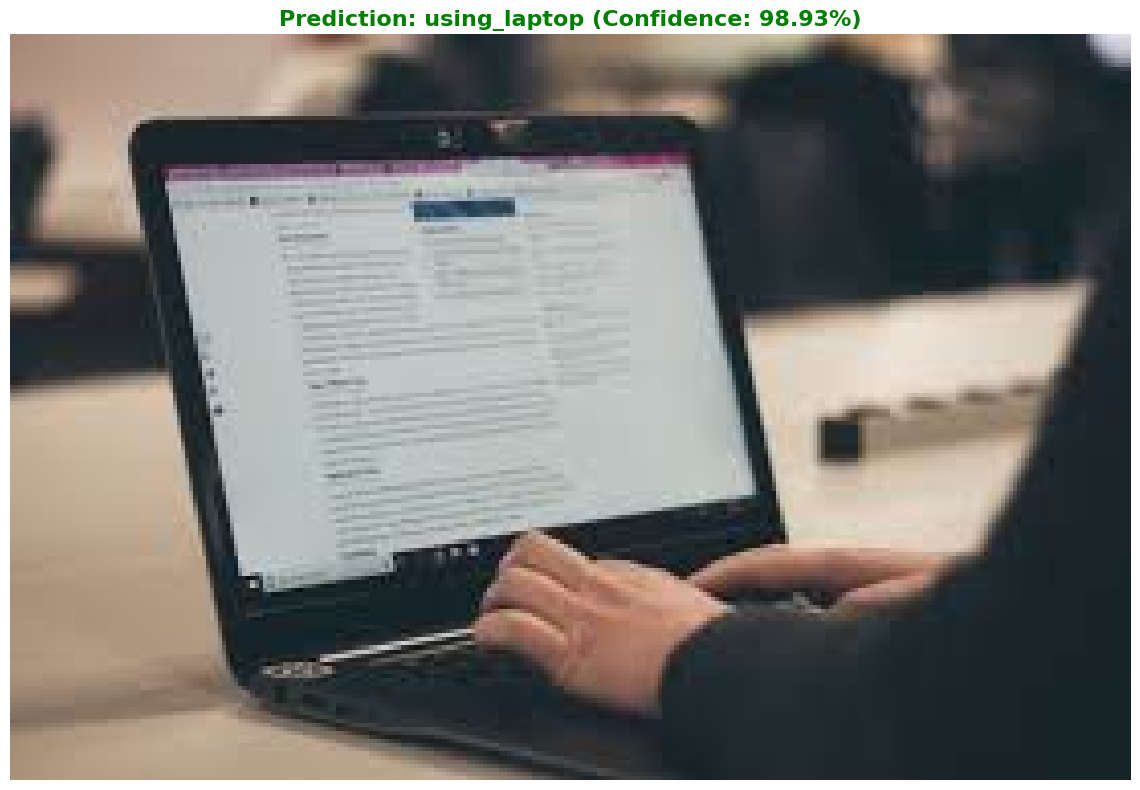


📊 Top 5 Predictions for 'use-laptop.jpg':
--------------------------------------------------
1. using_laptop         98.93% █████████████████████████████
2. sleeping              0.74% 
3. eating                0.26% 
4. hugging               0.03% 
5. clapping              0.01% 


✅ Testing complete!


In [4]:
# Upload images
print("\n📤 Please upload your images:")
uploaded = files.upload()

# Test each uploaded image
print(f"\n🔍 Testing {len(uploaded)} image(s)...\n")

for filename in uploaded.keys():
    print(f"\n{'='*60}")
    print(f"Testing: {filename}")
    print('='*60)

    # Run prediction
    results = model.predict(filename, verbose=False)

    # Get prediction details
    top_class = results[0].names[results[0].probs.top1]
    top_conf = results[0].probs.top1conf

    # Display image with prediction
    img = Image.open(filename)
    plt.figure(figsize=(12, 8))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prediction: {top_class} (Confidence: {top_conf:.2%})",
              fontsize=16, fontweight='bold', color='green')
    plt.tight_layout()
    plt.show()

    # Show top 5 predictions
    print(f"\n📊 Top 5 Predictions for '{filename}':")
    print("-" * 50)
    top5_indices = results[0].probs.top5
    for rank, idx in enumerate(top5_indices, 1):
        class_name = results[0].names[idx]
        confidence = results[0].probs.data[idx]
        bar = "█" * int(confidence * 30)
        print(f"{rank}. {class_name:20s} {confidence:6.2%} {bar}")
    print()

print("\n✅ Testing complete!")

In [8]:
!pip install huggingface_hub ultralytics opencv-python

from huggingface_hub import hf_hub_download
from ultralytics import YOLO
from google.colab import files
from IPython.display import HTML, display
from base64 import b64encode
import os

# Download the model
model_path = hf_hub_download(
    repo_id="leeyunjai/yolo11-cls-action",
    filename="action-11x.pt"
)

print(f"Model downloaded to: {model_path}")

# Load the YOLO model
print("\nLoading model...")
model = YOLO(model_path)
print("Model loaded successfully!")

# Upload video
print("\n📤 Please upload your video:")
uploaded = files.upload()

video_file = list(uploaded.keys())[0]
print(f"\n🎥 Processing video: {video_file}")

# Run prediction on video
print("\n🔍 Analyzing video... This may take a while...")
results = model.predict(video_file, save=True, verbose=True)

# Find the output video
output_video = None
for root, dirs, files_list in os.walk("runs/classify"):
    for file in files_list:
        if file.endswith('.avi') or file.endswith('.mp4'):
            output_video = os.path.join(root, file)
            break

if output_video and os.path.exists(output_video):
    print(f"\n✅ Video processed successfully!")
    print(f"📁 Output saved to: {output_video}")

    # Display the processed video
    print("\n🎬 Displaying processed video:")
    mp4_file = output_video.replace('.avi', '.mp4')

    # Convert to mp4 if needed
    if not output_video.endswith('.mp4'):
        os.system(f"ffmpeg -i {output_video} -vcodec libx264 {mp4_file} -y -loglevel quiet")
    else:
        mp4_file = output_video

    # Display video in Colab
    if os.path.exists(mp4_file):
        mp4 = open(mp4_file, 'rb').read()
        data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
        display(HTML(f"""
        <video width=800 controls>
            <source src="{data_url}" type="video/mp4">
        </video>
        """))

    # Download the result
    print("\n💾 Download the processed video:")
    files.download(mp4_file if os.path.exists(mp4_file) else output_video)

# Show statistics
print(f"\n📊 Video Analysis Summary:")
print("-" * 60)
print(f"Total frames analyzed: {len(results)}")

# Count predictions
predictions = {}
for result in results:
    pred_class = result.names[result.probs.top1]
    predictions[pred_class] = predictions.get(pred_class, 0) + 1

print("\nAction Distribution:")
for action, count in sorted(predictions.items(), key=lambda x: x[1], reverse=True):
    percentage = (count / len(results)) * 100
    bar = "█" * int(percentage / 2)
    print(f"{action:20s} {count:5d} frames ({percentage:5.1f}%) {bar}")

print("\n✅ Video testing complete!")

Model downloaded to: /root/.cache/huggingface/hub/models--leeyunjai--yolo11-cls-action/snapshots/b678d87a971774fe19ee676b9478b6e43fb73dd9/action-11x.pt

Loading model...
Model loaded successfully!

📤 Please upload your video:


Saving IMG_6682.MP4 to IMG_6682 (1).MP4

🎥 Processing video: IMG_6682 (1).MP4

🔍 Analyzing video... This may take a while...

WARNING ⚠️ 
Inference results will accumulate in RAM unless `stream=True` is passed, which can cause out-of-memory errors for large
sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/631) /content/IMG_6682 (1).MP4: 640x640 running 1.00, dancing 0.00, fighting 0.00, hugging 0.00, cycling 0.00, 50.8ms
video 1/1 (frame 2/631) /content/IMG_6682 (1).MP4: 640x640 running 1.00, dancing 0.00, fighting 0.00, cycling 0.00, hugging 0.00, 46.0ms
video 1/1 (frame 3/631) /content/IMG_6682 (1).MP4: 640x640 


💾 Download the processed video:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


📊 Video Analysis Summary:
------------------------------------------------------------
Total frames analyzed: 631

Action Distribution:
running                490 frames ( 77.7%) ██████████████████████████████████████
calling                 97 frames ( 15.4%) ███████
cycling                 41 frames (  6.5%) ███
texting                  2 frames (  0.3%) 
clapping                 1 frames (  0.2%) 

✅ Video testing complete!
